In [14]:
import pandas as pd
from pandasai import SmartDataframe
import os


In [16]:
from pandasai.llm import OpenAI
llm = OpenAI(api_token = "Insertar API Token")

APIKeyNotFoundError: OpenAI API key is required

In [3]:
df = pd.read_csv("student.csv", sep = ",")
df.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


Iniciar df

In [4]:
sdf = SmartDataframe(df, config={"llm": llm, "verbose": True})

EDA

In [5]:
print("Dataframe shape: ", df.shape)
print("Dataframe columns: ", df.columns)
print("Dataframe info: ", df.info())
print("Dataframe describe: ", df.describe())
print("Dataframe null values: ", df.isnull().sum())

Dataframe shape:  (145, 16)
Dataframe columns:  Index(['Unnamed: 0', 'Id', 'Student_Age', 'Sex', 'High_School_Type',
       'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation',
       'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes',
       'Listening_in_Class', 'Project_work', 'Grade'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         145 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non

In [6]:
sdf.chat("What is the average age of students?")

2024-04-17 22:29:09 [INFO] Question: What is the average age of students?
2024-04-17 22:29:10 [INFO] Running PandasAI with openai LLM...
2024-04-17 22:29:10 [INFO] Prompt ID: 39d9604b-d192-4b89-b3c5-40b704366dd0
2024-04-17 22:29:10 [INFO] Executing Pipeline: GenerateChatPipeline
2024-04-17 22:29:10 [INFO] Executing Step 0: ValidatePipelineInput
2024-04-17 22:29:10 [INFO] Executing Step 1: CacheLookup
2024-04-17 22:29:10 [INFO] Using cached response
2024-04-17 22:29:10 [INFO] Executing Step 2: PromptGeneration
2024-04-17 22:29:10 [INFO] Executing Step 2: Skipping...
2024-04-17 22:29:10 [INFO] Executing Step 3: CodeGenerator
2024-04-17 22:29:10 [INFO] Executing Step 3: Skipping...
2024-04-17 22:29:10 [INFO] Executing Step 4: CachePopulation
2024-04-17 22:29:10 [INFO] Executing Step 4: Skipping...
2024-04-17 22:29:10 [INFO] Executing Step 5: CodeExecution
2024-04-17 22:29:10 [INFO] 
Code running:
```
df = dfs[0]
average_age = df['Student_Age'].mean()
result = {'type': 'string', 'value': f

'The average age of students is 19.682758620689654.'

2024-04-17 22:29:11 [INFO] Question: Graficar la distribución de las edades de los estudiantes
2024-04-17 22:29:11 [INFO] Running PandasAI with openai LLM...
2024-04-17 22:29:11 [INFO] Prompt ID: a3dc8089-3c9d-4ca4-b70c-32259a630a9b
2024-04-17 22:29:11 [INFO] Executing Pipeline: GenerateChatPipeline
2024-04-17 22:29:11 [INFO] Executing Step 0: ValidatePipelineInput
2024-04-17 22:29:11 [INFO] Executing Step 1: CacheLookup
2024-04-17 22:29:11 [INFO] Using cached response
2024-04-17 22:29:11 [INFO] Executing Step 2: PromptGeneration
2024-04-17 22:29:11 [INFO] Executing Step 2: Skipping...
2024-04-17 22:29:11 [INFO] Executing Step 3: CodeGenerator
2024-04-17 22:29:11 [INFO] Executing Step 3: Skipping...
2024-04-17 22:29:11 [INFO] Executing Step 4: CachePopulation
2024-04-17 22:29:11 [INFO] Executing Step 4: Skipping...
2024-04-17 22:29:11 [INFO] Executing Step 5: CodeExecution
2024-04-17 22:29:11 [INFO] Saving charts to c:\Users\maria\Documents\UVG\Semestre 7\Minería de Datos\HDT5_mineria\

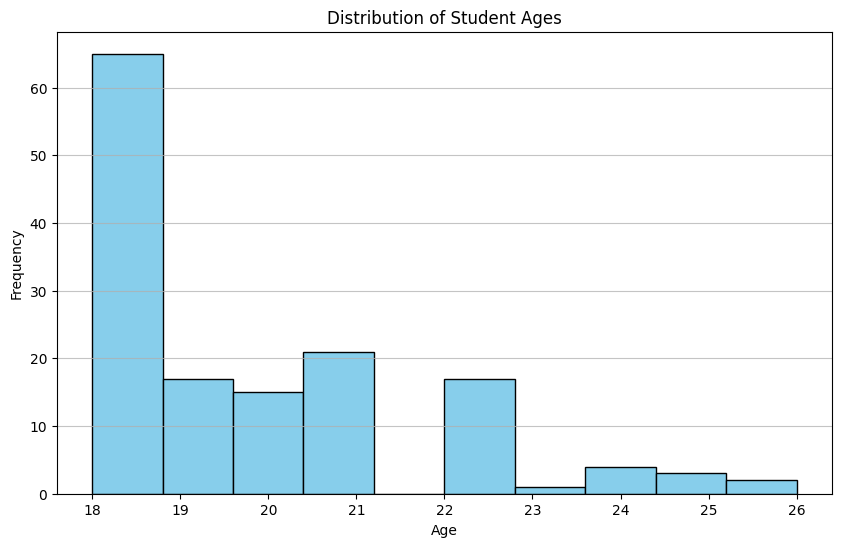

2024-04-17 22:29:13 [INFO] Executing Step 6: ResultValidation
2024-04-17 22:29:13 [INFO] Answer: {'type': 'plot', 'value': 'c:/Users/maria/Documents/UVG/Semestre 7/Minería de Datos/HDT5_mineria/exports/charts/temp_chart.png'}
2024-04-17 22:29:13 [INFO] Executing Step 7: ResultParsing


'c:/Users/maria/Documents/UVG/Semestre 7/Minería de Datos/HDT5_mineria/exports/charts/temp_chart.png'

In [7]:
sdf.chat("Graficar la distribución de las edades de los estudiantes")

In [8]:
sdf.chat("¿Cuál es la edad promedio de los estudiantes que son mujeres?")

2024-04-17 22:29:17 [INFO] Question: ¿Cuál es la edad promedio de los estudiantes que son mujeres?
2024-04-17 22:29:17 [INFO] Running PandasAI with openai LLM...
2024-04-17 22:29:17 [INFO] Prompt ID: 4a298833-5775-4c5a-bc1f-80ba961971ab
2024-04-17 22:29:17 [INFO] Executing Pipeline: GenerateChatPipeline
2024-04-17 22:29:17 [INFO] Executing Step 0: ValidatePipelineInput
2024-04-17 22:29:17 [INFO] Executing Step 1: CacheLookup
2024-04-17 22:29:17 [INFO] Using cached response
2024-04-17 22:29:17 [INFO] Executing Step 2: PromptGeneration
2024-04-17 22:29:17 [INFO] Executing Step 2: Skipping...
2024-04-17 22:29:17 [INFO] Executing Step 3: CodeGenerator
2024-04-17 22:29:18 [INFO] Executing Step 3: Skipping...
2024-04-17 22:29:18 [INFO] Executing Step 4: CachePopulation
2024-04-17 22:29:18 [INFO] Executing Step 4: Skipping...
2024-04-17 22:29:18 [INFO] Executing Step 5: CodeExecution
2024-04-17 22:29:18 [INFO] 
Code running:
```
female_students = dfs[0][dfs[0]['Sex'] == 'Female']
average_age_

'The average age of female students is 19.41'

In [9]:
sdf.chat("¿Cuál es la edad promedio de los estudiantes que son hombres?")

2024-04-17 22:29:18 [INFO] Question: ¿Cuál es la edad promedio de los estudiantes que son hombres?
2024-04-17 22:29:18 [INFO] Running PandasAI with openai LLM...
2024-04-17 22:29:18 [INFO] Prompt ID: 78868546-a547-4dca-986b-19d9c5327195
2024-04-17 22:29:18 [INFO] Executing Pipeline: GenerateChatPipeline
2024-04-17 22:29:18 [INFO] Executing Step 0: ValidatePipelineInput
2024-04-17 22:29:18 [INFO] Executing Step 1: CacheLookup
2024-04-17 22:29:18 [INFO] Executing Step 2: PromptGeneration
2024-04-17 22:29:18 [INFO] Using prompt: dfs[0]:
  name: null
  description: null
  type: pd.DataFrame
  rows: 145
  columns: 16
  schema:
    fields:
    - name: 'Unnamed: 0'
      type: int64
      samples:
      - 1
      - 60
      - 39
    - name: Id
      type: int64
      samples:
      - 5118
      - 5008
      - 5134
    - name: Student_Age
      type: int64
      samples:
      - 20
      - 26
      - 21
    - name: Sex
      type: object
      samples:
      - Male
      - Female
      - Male


'The average age of male students is 19.862068965517242'

In [10]:
sdf.chat("¿Cuál es la edad promedio de los estudiantes que son hombres y que tienen una calificación mayor a 70?")

2024-04-17 22:29:21 [INFO] Question: ¿Cuál es la edad promedio de los estudiantes que son hombres y que tienen una calificación mayor a 70?
2024-04-17 22:29:21 [INFO] Running PandasAI with openai LLM...
2024-04-17 22:29:22 [INFO] Prompt ID: 311d6ed0-7981-4d1c-9cb3-10dc0c603f1e
2024-04-17 22:29:22 [INFO] Executing Pipeline: GenerateChatPipeline
2024-04-17 22:29:22 [INFO] Executing Step 0: ValidatePipelineInput
2024-04-17 22:29:22 [INFO] Executing Step 1: CacheLookup
2024-04-17 22:29:22 [INFO] Executing Step 2: PromptGeneration
2024-04-17 22:29:22 [INFO] Using prompt: dfs[0]:
  name: null
  description: null
  type: pd.DataFrame
  rows: 145
  columns: 16
  schema:
    fields:
    - name: 'Unnamed: 0'
      type: int64
      samples:
      - 1
      - 60
      - 39
    - name: Id
      type: int64
      samples:
      - 5118
      - 5008
      - 5134
    - name: Student_Age
      type: int64
      samples:
      - 20
      - 26
      - 21
    - name: Sex
      type: object
      samples:


19.862068965517242

In [11]:
sdf.chat("De que tipo de high school son los estuaintes que tienen una calificación mayor a 70?")

2024-04-17 22:29:25 [INFO] Question: De que tipo de high school son los estuaintes que tienen una calificación mayor a 70?
2024-04-17 22:29:25 [INFO] Running PandasAI with openai LLM...
2024-04-17 22:29:26 [INFO] Prompt ID: a7f63f14-3876-469e-b97c-f408cc38a890
2024-04-17 22:29:26 [INFO] Executing Pipeline: GenerateChatPipeline
2024-04-17 22:29:26 [INFO] Executing Step 0: ValidatePipelineInput
2024-04-17 22:29:26 [INFO] Executing Step 1: CacheLookup
2024-04-17 22:29:26 [INFO] Executing Step 2: PromptGeneration
2024-04-17 22:29:26 [INFO] Using prompt: dfs[0]:
  name: null
  description: null
  type: pd.DataFrame
  rows: 145
  columns: 16
  schema:
    fields:
    - name: 'Unnamed: 0'
      type: int64
      samples:
      - 1
      - 60
      - 39
    - name: Id
      type: int64
      samples:
      - 5118
      - 5008
      - 5134
    - name: Student_Age
      type: int64
      samples:
      - 20
      - 26
      - 21
    - name: Sex
      type: object
      samples:
      - Male
    

'The students who have a grade higher than 70 attend the following types of high schools: Other, State, Private.'

2024-04-17 22:29:29 [INFO] Question: Grafica de la validacion de datos atipicos del dataframe
2024-04-17 22:29:29 [INFO] Running PandasAI with openai LLM...
2024-04-17 22:29:29 [INFO] Prompt ID: 149a1443-686c-4a11-b638-15dd832419cc
2024-04-17 22:29:29 [INFO] Executing Pipeline: GenerateChatPipeline
2024-04-17 22:29:29 [INFO] Executing Step 0: ValidatePipelineInput
2024-04-17 22:29:29 [INFO] Executing Step 1: CacheLookup
2024-04-17 22:29:29 [INFO] Executing Step 2: PromptGeneration
2024-04-17 22:29:29 [INFO] Using prompt: dfs[0]:
  name: null
  description: null
  type: pd.DataFrame
  rows: 145
  columns: 16
  schema:
    fields:
    - name: 'Unnamed: 0'
      type: int64
      samples:
      - 1
      - 60
      - 39
    - name: Id
      type: int64
      samples:
      - 5118
      - 5008
      - 5134
    - name: Student_Age
      type: int64
      samples:
      - 20
      - 26
      - 21
    - name: Sex
      type: object
      samples:
      - Male
      - Female
      - Male
    -

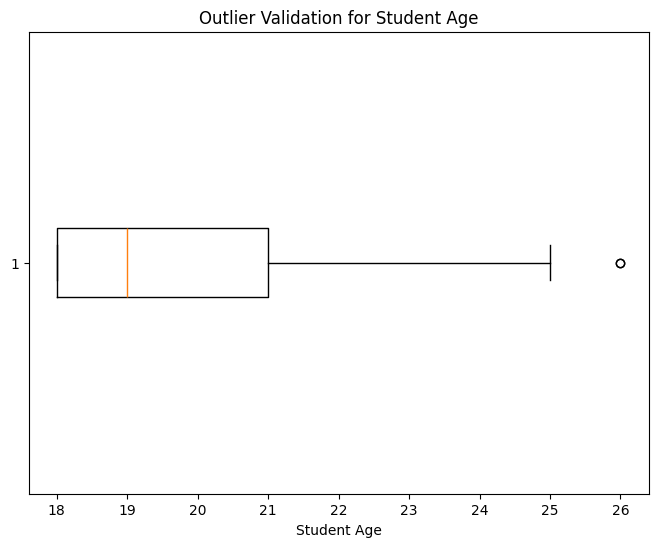

2024-04-17 22:29:32 [INFO] Executing Step 6: ResultValidation
2024-04-17 22:29:32 [INFO] Answer: {'type': 'plot', 'value': 'c:/Users/maria/Documents/UVG/Semestre 7/Minería de Datos/HDT5_mineria/exports/charts/temp_chart.png'}
2024-04-17 22:29:32 [INFO] Executing Step 7: ResultParsing


'c:/Users/maria/Documents/UVG/Semestre 7/Minería de Datos/HDT5_mineria/exports/charts/temp_chart.png'

In [12]:
sdf.chat("Grafica de la validacion de datos atipicos del dataframe")

### Informe

#### Exploración Inicial
Se realizó una exploración inicial del DataFrame para comprender su estructura y las características de los datos. Esto incluyó la verificación de las primeras filas del DataFrame, el número de filas y columnas, así como los tipos de datos de cada columna.

Resultados:
Número de Filas y Columnas: El DataFrame contiene 145 filas y 16 columnas.
Tipos de Datos: El DataFrame consta de 4 columnas numéricas y 12 columnas de tipo objeto (categóricas).
Resumen Estadístico: Se obtuvo un resumen estadístico que incluye recuentos, medias, desviaciones estándar y cuartiles para las columnas numéricas.


#### Análisis de Datos
Se realizaron análisis adicionales para comprender mejor los datos y extraer información relevante. Esto incluyó calcular el promedio de edad de los estudiantes, así como el promedio de edad para subgrupos específicos, como estudiantes femeninas y estudiantes masculinos con calificaciones superiores a 70.

Resultados:
Promedio de Edad de Estudiantes: El promedio de edad de todos los estudiantes es de 19.68 años.
Promedio de Edad de Estudiantes Females: El promedio de edad de las estudiantes femeninas es de 19.41 años.
Promedio de Edad de Estudiantes Masculinos con Calificaciones Superiores a 70: El promedio de edad de los estudiantes masculinos con calificaciones superiores a 70 es de 19.86 años.
Tipos de Escuela de Estudiantes con Calificaciones Superiores a 70: Los estudiantes que tienen una calificación superior a 70 asisten a los siguientes tipos de escuelas: Other, State, Private.

#### Conclusiones
El análisis exploratorio de datos proporcionó una comprensión inicial de las características del conjunto de datos de los estudiantes. Se identificaron algunos patrones interesantes relacionados con la edad de los estudiantes y su desempeño académico, así como el tipo de escuela al que asisten los estudiantes con calificaciones superiores a 70. 